# Importamos librerías a utilizar

In [1]:
#Para crear y análizar redes
import networkx as nx
#Para dibujar redes y graficar funciones
import matplotlib.pyplot as plt

#  Creación de la red

Creamos la red como una lista de enlaces, donde cada enlace tiene el atributo weight que indica que tan fuerte es la amistad en una escala de 1 a 3

In [2]:
lista_enlaces = [("Alicia","Beto"),
             ("Carlos","Alicia"),
             ("Alicia","David"),
             ("Alicia","Carmen"),
             ("Alicia","Monica"),
             ("Beto","Jorge"),
             ("Jorge","Enrique"),
             ("Enrique","Rosa"),
             ("Rosa","Jorge"),
             ("Enrique","Irene"),
             ("Irene","Jorge"),
             ("Irene","Rosa"),
             ("Carmen","Monica"),
             ("David","Carlos"),
             ("Carlos","Monica"),
             ("Carmen","Irene")]

Creamos la red

In [3]:
G = nx.Graph(lista_enlaces)

## Informacion de la red

### ACTIVIDAD 1
Cree una función imprime_informacion que imprime la información de la red. Recibe la red G e imprime el numero de nodos, numero de enlaces, diámetro, y densidad de la red G.

In [4]:
def imprime_informacion(P):
    # nodos
    print("Información de la red: \n")
    print("\tEl número de nodos es: ",len(nx.nodes(P)))
    # enlaces
    print("\tEl número de enlaces es: ",len(nx.edges(P)))
    # diametro
    print("\tEl diámetro es: ",nx.diameter(P))    
    print("\tLa densidad de la red es ",nx.density(P))
    
    print(nx.info(P))


Llama a la función para imprimir información

In [5]:
imprime_informacion(G)

Información de la red: 

	El número de nodos es:  10
	El número de enlaces es:  16
	El diámetro es:  4
	La densidad de la red es  0.35555555555555557
Name: 
Type: Graph
Number of nodes: 10
Number of edges: 16
Average degree:   3.2000


## Dibujamos la red

### ACTIVIDAD 2
Cree una funcion grafica_red que gráfica la red G. Recibe como parámetros a la red G y la variable nombre_red. Grafica la red G y la guarda en un archivo png con el nombre almacenado en nombre_red. 

In [6]:
def grafica_red(G, nombre_red):
    plt.clf() #limpia el marco de graficación    
    nx.draw(G,with_labels=True,node_color="pink")
    plt.savefig(nombre_red)
    plt.show()
    #imprime_informacion(G)

Llamamos a la función que gráfica la red

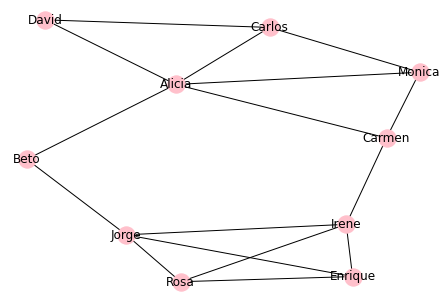

In [7]:
grafica_red(G, "amigos")

# Metricas de grado

## Distribucion de grados

### ACTIVIDAD 3
Cree una funcion grafica_distribucion_grados. Recibe la red G y la variable nombre_dg. Cálcula, imprime y gráfica la distribución de grados. La gráfica la guarda en un archivo png con nombre almacenado en la variable nombre_dg. Devuleve la distribución de grados

In [8]:
def grafica_distribucion_grados(G, nombre_dg):
    plt.clf() #limpia el marco de graficación    
    dist_grados = nx.degree_histogram(G)
    x=[x for x in range(len(dist_grados))]
    plt.plot(x,dist_grados)
    plt.title("Distribución de grados")
    plt.xlabel("Grados")
    plt.ylabel("Número de nodos")
    plt.savefig(nombre_dg)
    print("La distribución de grados es: ",dist_grados)
    return dist_grados


Llama a la función para graficar las distribucion de grados

La distribución de grados es:  [0, 0, 2, 5, 2, 1]


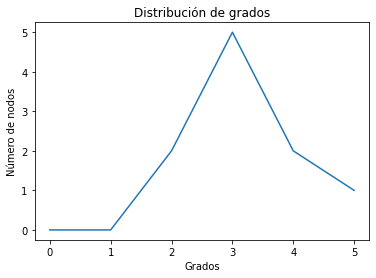

In [9]:
dist_grados = grafica_distribucion_grados(G, "distribucion_amigos")

## Grado promedio de la red

### ACTIVIDAD 4
Cree una función grado_promedio. Recibe la red G y su distribución de grados, imprime y devuelve el valor del grado promedio

In [10]:
def grado_promedio(G, dist_grados):
    promedio =0; cont=0
    for (node,val) in G.degree():
        promedio +=val
        cont+=1
    promedio =promedio/cont
    print("El grado promedio de la red es:",promedio)
    return promedio
   

Llama a la información para cálcular el grado promedio

In [11]:
grado_promedio(G, dist_grados)

El grado promedio de la red es: 3.2


3.2

## Mapa de calor para el grado nodal

La siguiente funcion que grafica el mapa de calor del grado nodal. Recibe la red G y la variable mapcalor_grado. Gráfica el mapa de calor del grado nodal de la red G. La gráfica la guarda en un archivo png con nombre almacenado en la variable mapcalor_grado

### ACTIVIDAD 5
Modifica el los colores del mapa de color, ver mapas de color en https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [12]:
def mapa_calor_grado(G, nombre_mcalor_grado):
    plt.clf() #limpia el marco de graficación    
    degree_map = {node:nx.degree(G, node) for node in G.nodes()}
    #valores máximo y mínimos de grado
    max_degree = max(degree_map.values())
    min_degree = min(degree_map.values())
    #el grado nodal nos da el color de nodo, el cual se mapea con el mapa de color
    colores_nodos = list(degree_map.values())
    #ver mapas de color en https://matplotlib.org/stable/tutorials/colors/colormaps.html
    mapa_color = plt.get_cmap('cool')
    #dibujamos la red
    nx.draw(G, cmap=mapa_color, node_color=colores_nodos, with_labels=True)
    #dibujamos la barra de color
    sm = plt.cm.ScalarMappable(cmap=mapa_color,norm=plt.Normalize(vmin = min_degree, vmax=max_degree))
    cbar = plt.colorbar(sm)
    cbar.set_label('Grado')
    plt.savefig(nombre_mcalor_grado + ".png")
    plt.show()
    # la siguiente instruccion limpia la figura, evitando que al graficar varias figuras, estas no se encimen 
    plt.clf()

Llama a la función para gráficar el mapa de calor

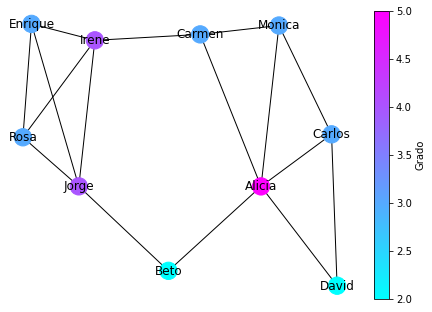

<Figure size 432x288 with 0 Axes>

In [13]:
mapa_calor_grado(G,"mcalor_grado_amigos")

# Modelos de red

## Red completa
Creamos una red completa de 10 nodos

In [14]:
kn = nx.complete_graph(10)

Llama a la función para imprimir información

In [15]:
imprime_informacion(kn)

Información de la red: 

	El número de nodos es:  10
	El número de enlaces es:  45
	El diámetro es:  1
	La densidad de la red es  1.0
Name: 
Type: Graph
Number of nodes: 10
Number of edges: 45
Average degree:   9.0000


Llamamos a la función que gráfica la red

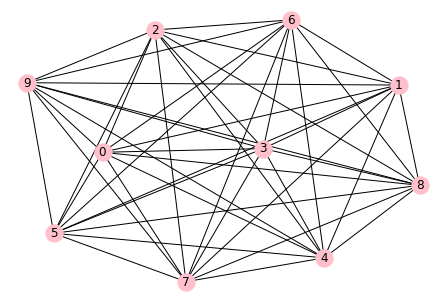

In [16]:
grafica_red(kn, "completa")

Llama a la función para graficar las distribucion de grados

La distribución de grados es:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 10]


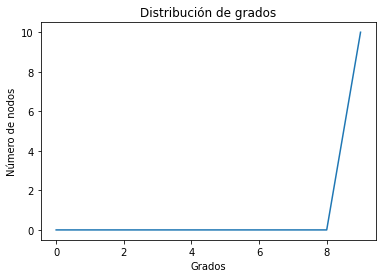

In [17]:
dist_grados = grafica_distribucion_grados(kn, "dist_grados_completa")

Llama a la información para cálcular el grado promedio

In [18]:
grado_promedio(kn, dist_grados)

El grado promedio de la red es: 9.0


9.0

Llama a la función para gráficar el mapa de calor

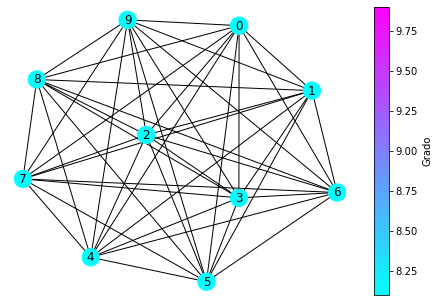

<Figure size 432x288 with 0 Axes>

In [19]:
mapa_calor_grado(kn,"mcalor_grado_completa")

## Red aleatoria Barabasi-Albert
### ACTIVIDAD 6
Creamos una red aleatoria con el modelo Barabasi-Albert y con parámetros n=100 y m=5. Esto quiere decir que la red comienza con m=5 nodos y en cada iteracion se agrega un nuevo nodo que se conecta aletareamente m=5 nodos. El algoritmo termina cuando se tiene un total de n=100 nodos.

https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html#networkx.generators.random_graphs.barabasi_albert_graph

In [104]:
B = nx.generators.random_graphs.barabasi_albert_graph(100,5,seed=None)

### ACTIVIDAD 7
Llama a la función para imprimir información de la red Barabasi-Albert

In [105]:
imprime_informacion(B)

Información de la red: 

	El número de nodos es:  100
	El número de enlaces es:  475
	El diámetro es:  4
	La densidad de la red es  0.09595959595959595
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 475
Average degree:   9.5000


### ACTIVIDAD 8
Llamamos a la función que gráfica la red Barabasi-Albert

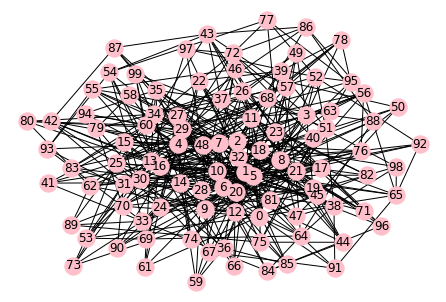

In [106]:
grafica_red(B, "Barabasi-Albert")

### ACTIVIDAD 9
Llama a la función para graficar las distribucion de grados de la red Barabasi-Albert

La distribución de grados es:  [0, 0, 0, 0, 0, 32, 11, 13, 7, 4, 5, 2, 4, 2, 4, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


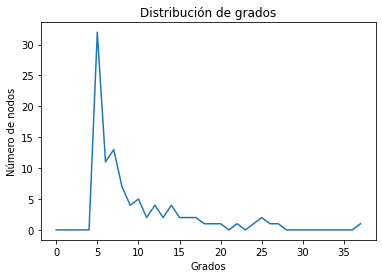

In [107]:
dist_grados = grafica_distribucion_grados(B, "dist_grados_Barabasi_Albert")

### ACTIVIDAD 10
Llama a la información para cálcular el grado promedio de la red Barabasi-Albert

In [108]:
grado_promedio(B, dist_grados)

El grado promedio de la red es: 9.5


9.5

### ACTIVIDAD 11
Llama a la función para gráficar el mapa de calor de la red Barabasi-Albert

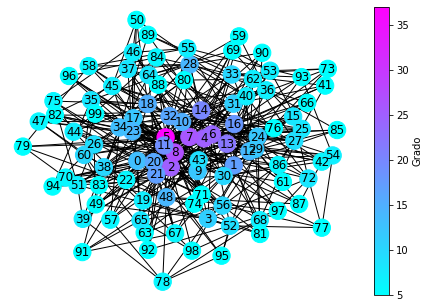

<Figure size 432x288 with 0 Axes>

In [109]:
mapa_calor_grado(B,"mcalor_grado_Barabasi_Albert")

## Red aleatoria Erdös–Rényi (Gilbert)
### ACTIVIDAD 12
Creamos una red aleatoria con el modelo Erdős–Rényi (implementado con el algoritmo de Gilbert) y con parámteros n=100 y p=0.1. Eso quiere decir que la red tendrá n=100 y cada par de nodos se conectara con probabilidad p=0.1

https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#networkx.generators.random_graphs.erdos_renyi_graph

In [110]:
Er = nx.generators.random_graphs.erdos_renyi_graph(100, 0.1, seed=None, directed=False)

### ACTIVIDAD 13
Llama a la función para imprimir información de la red aleatoria Erdös-Rényi

In [111]:
imprime_informacion(Er)

Información de la red: 

	El número de nodos es:  100
	El número de enlaces es:  496
	El diámetro es:  4
	La densidad de la red es  0.10020202020202021
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 496
Average degree:   9.9200


### ACTIVIDAD 14
Llamamos a la función que gráfica a la red aleatoria Erdös-Rényi

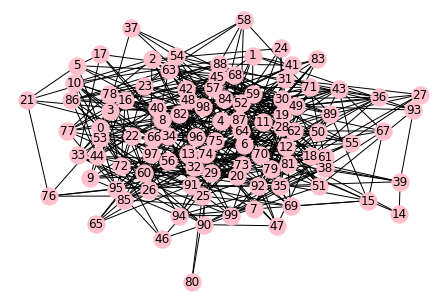

In [112]:
grafica_red(Er, "Erdös_Rényi")

### ACTIVIDAD 15
Llama a la función para graficar las distribucion de grados de la red aleatoria Erdös-Rényi

La distribución de grados es:  [0, 0, 1, 1, 2, 7, 5, 6, 14, 6, 11, 16, 11, 8, 6, 1, 2, 1, 2]


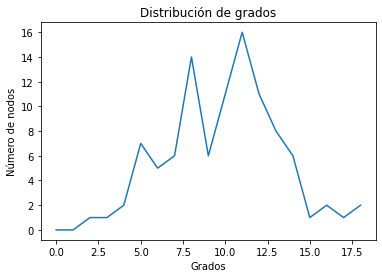

In [113]:
dist_grados = grafica_distribucion_grados(Er, "dist_grados_Erdös_Rényi")

### ACTIVIDAD 16
Llama a la información para cálcular el grado promedio de la red aleatoria Erdös-Rényi

In [114]:
grado_promedio(Er, dist_grados)

El grado promedio de la red es: 9.92


9.92

### ACTIVIDAD 17
Llama a la función para gráficar el mapa de calor de la red aleatoria Erdös-Rényi

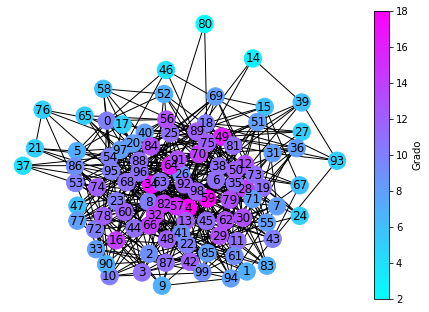

<Figure size 432x288 with 0 Axes>

In [115]:
mapa_calor_grado(Er,"mcalor_grado_Erdös_Rényi")

## Red aleatoria Watts-Strogatz
### ACTIVIDAD 18
Creamos una red aleatoria con el modelo Watts-Strogatz (implementado con el algoritmo de Gilbert) y con parámteros n=100, k=8, p=0.0.5. Eso quiere decir que la red tendrá n=100 inicialmente conectados a si 8 vecinos más cercanos en un anillo. Durante la ejecución del algoritmo, cada enlace se reconectará con probabilidad p=0.01

https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html#networkx.generators.random_graphs.watts_strogatz_graph

In [116]:
W = nx.generators.random_graphs.watts_strogatz_graph(100, 8, 0.01, seed=None)

### ACTIVIDAD 19
Llama a la función para imprimir información de la red aleatoria Watts-Strogatz

In [117]:
imprime_informacion(W)

Información de la red: 

	El número de nodos es:  100
	El número de enlaces es:  400
	El diámetro es:  10
	La densidad de la red es  0.08080808080808081
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 400
Average degree:   8.0000


### ACTIVIDAD 20
Llamamos a la función que gráfica la red aleatoria Watts-Strogatz

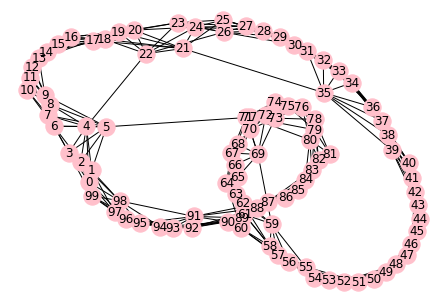

In [118]:
grafica_red(W, "Watts-Strogatz")

### ACTIVIDAD 21
Llama a la función para graficar las distribucion de grados de la red aleatoria Watts-Strogatz

La distribución de grados es:  [0, 0, 0, 0, 0, 0, 0, 5, 90, 5]


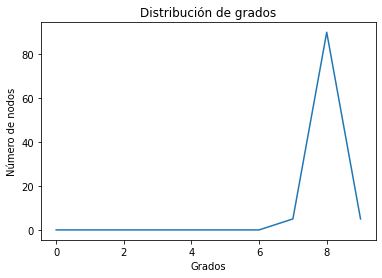

In [119]:
dist_grados = grafica_distribucion_grados(W, "Watts-Strogatz")

### ACTIVIDAD 22
Llama a la información para cálcular el grado promedio de la red aleatoria Watts-Strogatz

In [120]:
grado_promedio(W, dist_grados)

El grado promedio de la red es: 8.0


8.0

### ACTIVIDAD 23
Llama a la función para gráficar el mapa de calor de la red aleatoria Watts-Strogatz

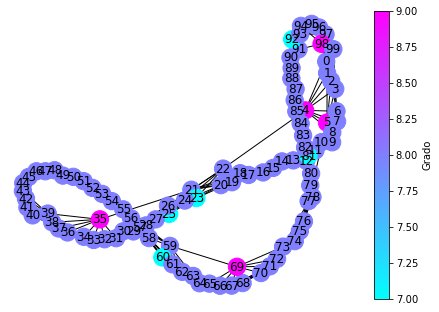

<Figure size 432x288 with 0 Axes>

In [121]:
mapa_calor_grado(W,"mcalor_grado_Watts-Strogatz")

# Análisis de la distribucion de grado de la red aleatoria Watts-Strogatz

### ACTIVIDAD 24
Cree 9 redes con el modelo Watts-Strogatz y los parámetros n=100, k=8, tomando los siguientes valores de p = 0, 0.01, 0.03, 0.1, 0.3, 0.5, 0.7, 0.9, 1. Para cada red obtenga su gráfica de distribucion de probabilidad y mapa de calor de grado

Watts-Strogatz1


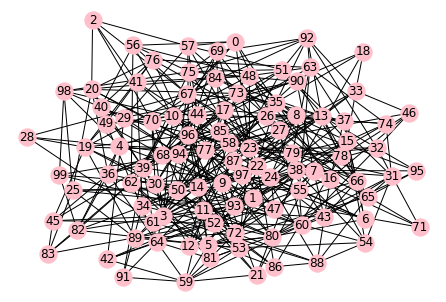

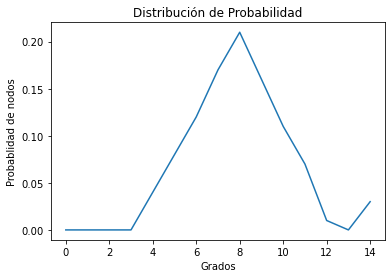

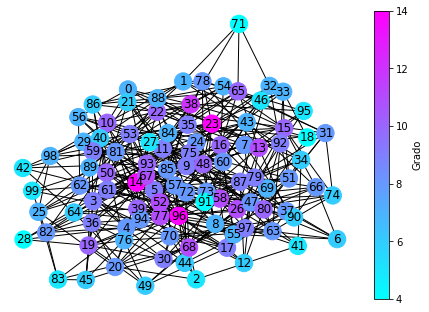

Watts-Strogatz2


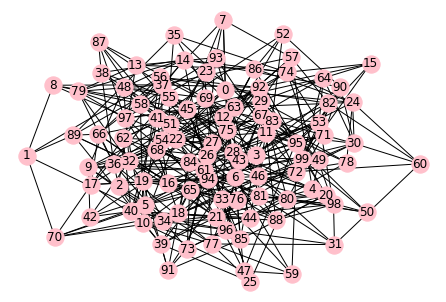

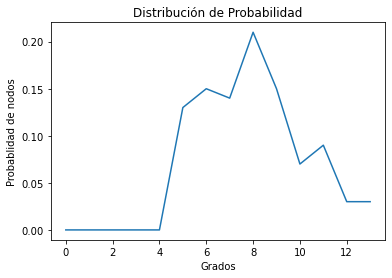

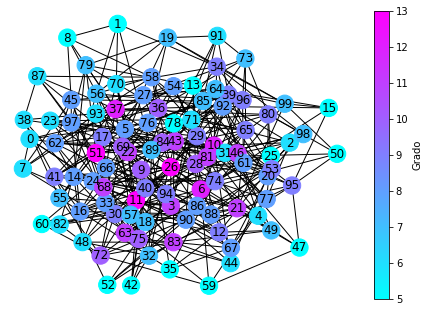

Watts-Strogatz3


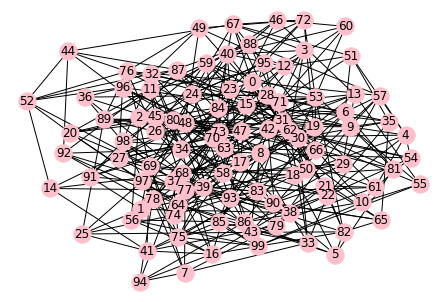

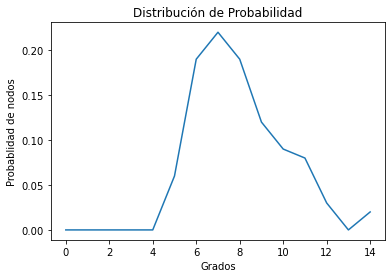

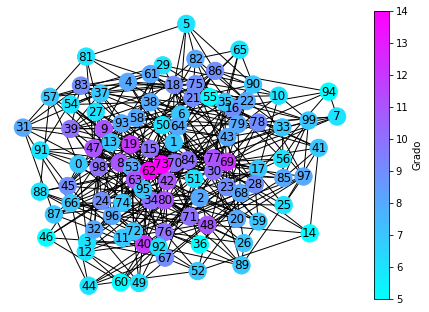

Watts-Strogatz4


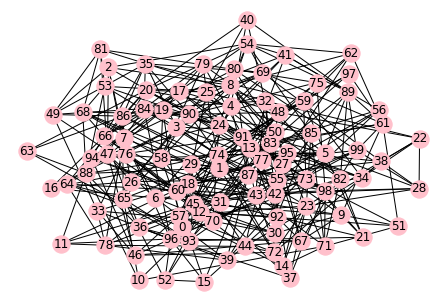

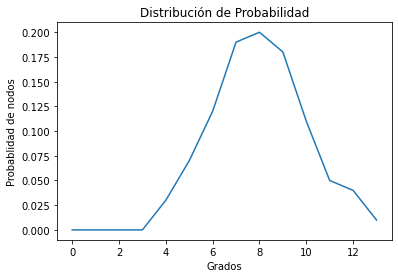

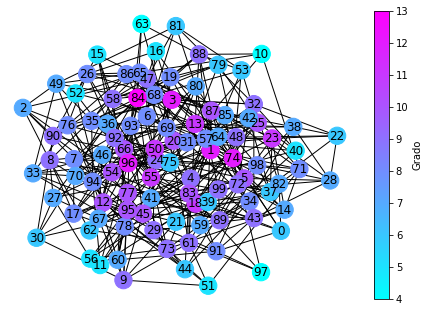

Watts-Strogatz5


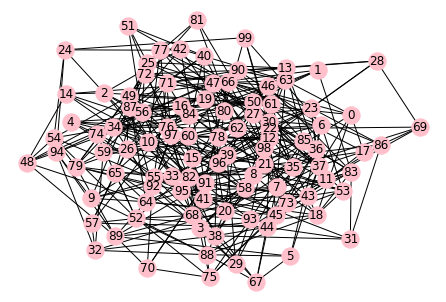

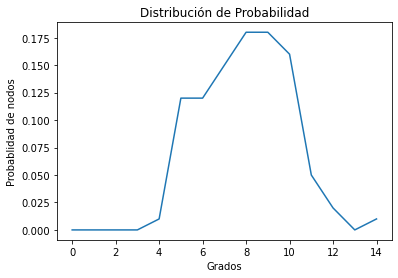

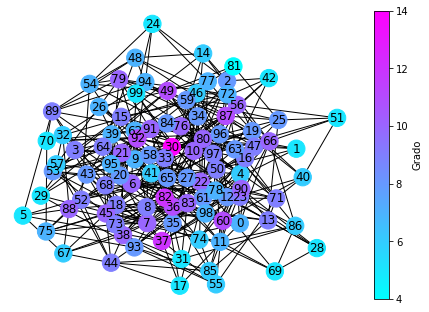

Watts-Strogatz6


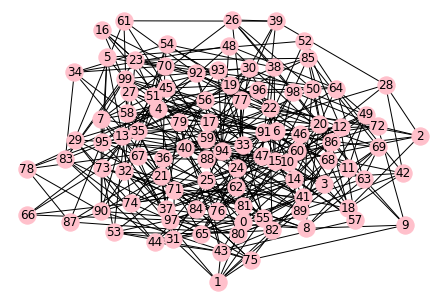

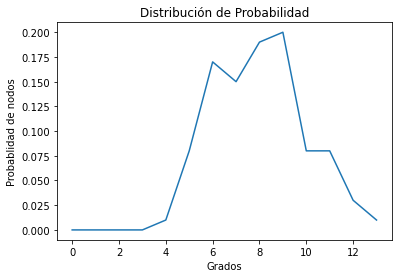

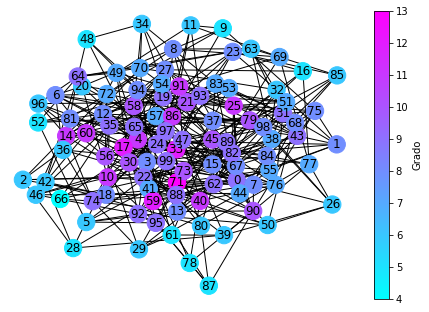

Watts-Strogatz7


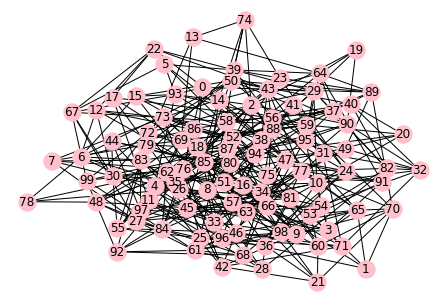

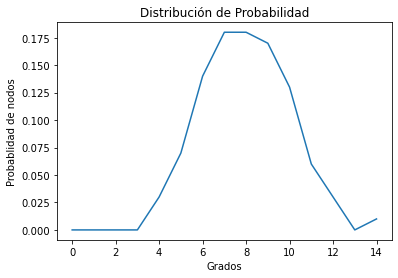

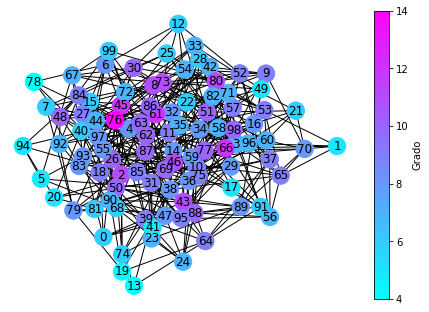

Watts-Strogatz8


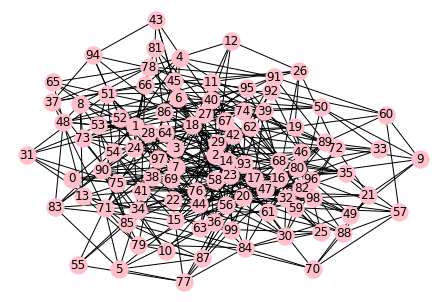

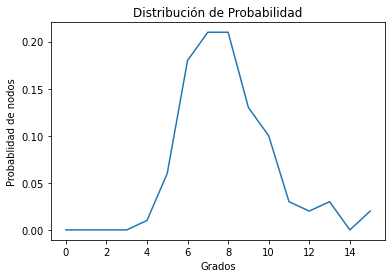

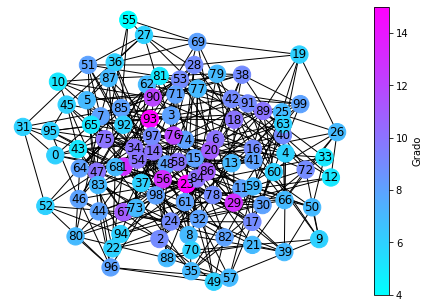

Watts-Strogatz9


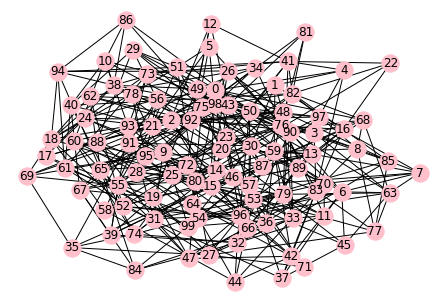

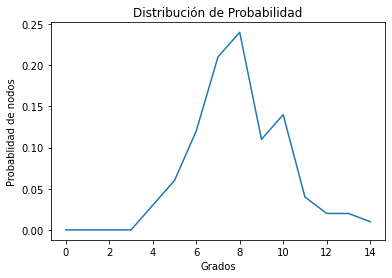

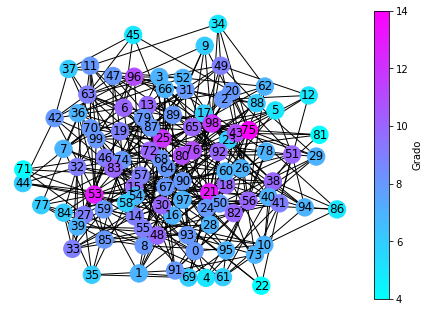

<Figure size 432x288 with 0 Axes>

In [126]:
def Watts_Strogatz (nombre_red,prob): #función en donde se acomodan los nombres de las gráficas y su creación
    n =100; k=8; aux=" ";probabilidad ="_probabilidad";mcg="_mCalor"    
    W1= nx.generators.random_graphs.watts_strogatz_graph(n, k, prob, seed=None)# se crea la red
    aux = nombre_red+probabilidad   # se crea el nombre de la grafica
    print(nombre_red)
    grafica_red(W1, nombre_red)    
    grafica_distribucion_probabilidad(W1,aux)
    aux= nombre_red +mcg    
    mapa_calor_grado(W1,aux)
    
    
def grafica_distribucion_probabilidad(G, nombre_dg):#función donde sólo se modifica el título de la gráfica y se determina la 
    dist_grados1 = nx.degree_histogram(G)    # distribución de probabilidad 
    for i in range(len(dist_grados1)):
        dist_grados1[i] = dist_grados1[i]/100   
    plt.plot(dist_grados1)
    plt.title("Distribución de Probabilidad")
    plt.xlabel("Grados")
    plt.ylabel("Probablidad de nodos")
    plt.savefig(nombre_dg) 
    plt.show()

#-------------------------------------------INICIO--------------------------------------------------

probabilidades = [0, 0.01, 0.03, 0.1, 0.3, 0.5, 0.7, 0.9, 1]; n=100;k=8;lista_nombres =[];nombre="Watts-Strogatz"

for i in range(9):
    lista_nombres.append(nombre+str(i+1))
    Watts_Strogatz(lista_nombres[i],probabilidades[8])        